In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

## Pandas Train Data

In [2]:
dataframe_train = pd.read_csv('train_data-2018-09-29-2019-09-29.csv')
dataframe_train = dataframe_train.fillna(method='ffill')
del dataframe_train['Date']
dataframe_train.head()

,VFINX(t-1),TROW(t-1),AME(t-1),HON(t-1),DFS(t-1),ALL(t-1),ACN(t-1),ANSS(t-1),IEX(t-1),DOV(t-1),...,FMC(t-1),ADP(t-1),ADBE(t-1),PFG(t-1),VFC(t-1),J(t-1),TEL(t-1),KSU(t-1),OKE(t-1),VFINX
0,260.239471,103.538559,78.568626,154.321274,72.776505,94.539589,167.113846,186.000000,146.973923,84.683670,...,73.115768,144.150208,275.489990,53.536732,83.702904,75.731094,83.194809,113.995712,57.925274,260.143127
1,260.143127,104.820305,78.539040,153.941116,73.345573,94.846626,166.767136,182.210007,145.816498,84.683670,...,74.699257,145.135178,272.000000,53.774277,83.380348,75.868683,83.271461,111.942970,57.026356,260.326233
2,260.326233,105.348068,78.677048,153.338425,73.990540,94.817833,167.720612,182.220001,146.837753,84.635620,...,76.641113,144.963043,270.510010,54.642189,84.043381,76.281441,83.166061,110.945923,57.488415,258.254456
3,258.254456,104.424477,78.115204,152.717224,73.734451,95.412743,165.524673,175.380005,145.728958,84.693268,...,76.066055,143.652939,263.709991,55.336517,81.937820,76.517296,82.552856,111.444450,57.530418,256.837982
4,256.837982,103.029625,77.523804,152.123840,72.861847,95.556664,164.917877,173.750000,144.007416,83.991982,...,75.557678,144.389282,263.220001,54.815769,81.955727,75.220070,80.665329,109.577431,57.639633,256.731964


## Pandas Test Data

In [3]:
dataframe_pred = pd.read_csv('train_data-2018-09-29-2019-09-29.csv')
dataframe_pred = dataframe_pred.fillna(method='ffill')
del dataframe_pred['Date']
dataframe_pred.head()

,VFINX(t-1),TROW(t-1),AME(t-1),HON(t-1),DFS(t-1),ALL(t-1),ACN(t-1),ANSS(t-1),IEX(t-1),DOV(t-1),...,FMC(t-1),ADP(t-1),ADBE(t-1),PFG(t-1),VFC(t-1),J(t-1),TEL(t-1),KSU(t-1),OKE(t-1),VFINX
0,260.239471,103.538559,78.568626,154.321274,72.776505,94.539589,167.113846,186.000000,146.973923,84.683670,...,73.115768,144.150208,275.489990,53.536732,83.702904,75.731094,83.194809,113.995712,57.925274,260.143127
1,260.143127,104.820305,78.539040,153.941116,73.345573,94.846626,166.767136,182.210007,145.816498,84.683670,...,74.699257,145.135178,272.000000,53.774277,83.380348,75.868683,83.271461,111.942970,57.026356,260.326233
2,260.326233,105.348068,78.677048,153.338425,73.990540,94.817833,167.720612,182.220001,146.837753,84.635620,...,76.641113,144.963043,270.510010,54.642189,84.043381,76.281441,83.166061,110.945923,57.488415,258.254456
3,258.254456,104.424477,78.115204,152.717224,73.734451,95.412743,165.524673,175.380005,145.728958,84.693268,...,76.066055,143.652939,263.709991,55.336517,81.937820,76.517296,82.552856,111.444450,57.530418,256.837982
4,256.837982,103.029625,77.523804,152.123840,72.861847,95.556664,164.917877,173.750000,144.007416,83.991982,...,75.557678,144.389282,263.220001,54.815769,81.955727,75.220070,80.665329,109.577431,57.639633,256.731964


In [4]:
import numpy as np  
from sklearn.decomposition import PCA  
X = np.array(dataframe_train[:249])  
pca = PCA(n_components=11)  
print (pca)  
newData = pca.fit_transform(X) 
print(newData)
print(pca.explained_variance_ratio_) 

PCA(n_components=11)
[[-11.73655479  -3.32322856  -5.03745337 ...  -3.45392431  -3.47678847
    2.03125418]
 [ -8.45443254  -1.45621021  -7.51890488 ...  -3.99747458  -1.68162056
    3.00208837]
 [ -8.20531104   0.17216393  -6.8468852  ...  -4.56201418  -0.08028683
    1.00545091]
 ...
 [-56.64414615  24.36003441   0.37866808 ...  -0.72616687  -1.04293158
   -0.51831103]
 [-61.70266595  20.99816612   0.97789258 ...  -0.07029132  -1.1301173
   -1.54115553]
 [-66.41388598  16.4839087    4.52452084 ...  -1.01662805  -2.49204156
   -2.96534773]]
[0.9254424  0.01999356 0.01626331 0.01023387 0.00778932 0.00484228
 0.00296859 0.00283688 0.00198167 0.00146751 0.00136901]


## Normalize test

In [5]:
from scipy import stats
print(stats.shapiro(dataframe_train['VFINX(t-1)'].values))
print(stats.shapiro(dataframe_train['TROW(t-1)'].values))

ShapiroResult(statistic=0.961226761341095, pvalue=2.964588929899037e-06)
ShapiroResult(statistic=0.9770286679267883, pvalue=0.0004644916334655136)


## Min Max Scaler

In [6]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(newData[:249])
scaled_train = scaler.fit_transform(newData[:249])
scaled_train = Variable(torch.tensor(scaled_train).type(torch.FloatTensor))

scal = MinMaxScaler()
scal = scaler.fit(newData[:249])
scaled_test = scal.fit_transform(newData[:249])
scaled_test = Variable(torch.tensor(scaled_test).type(torch.FloatTensor))



In [7]:
import torch.nn as nn
losses = []

model = nn.Sequential(torch.nn.Linear(11,1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.09)
loss_function = torch.nn.MSELoss()

for epoch in range(0,100):
    prediction = model(scaled_train)
    loss = loss_function(prediction,scaled_test[:,0])
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(loss)

tensor(0.9089, grad_fn=<MseLossBackward>)
tensor(0.0713, grad_fn=<MseLossBackward>)
tensor(0.0703, grad_fn=<MseLossBackward>)
tensor(0.0694, grad_fn=<MseLossBackward>)
tensor(0.0686, grad_fn=<MseLossBackward>)
tensor(0.0679, grad_fn=<MseLossBackward>)
tensor(0.0673, grad_fn=<MseLossBackward>)
tensor(0.0668, grad_fn=<MseLossBackward>)
tensor(0.0663, grad_fn=<MseLossBackward>)
tensor(0.0659, grad_fn=<MseLossBackward>)


D:\anaconda\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([249])) that is different to the input size (torch.Size([249, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Show Loss

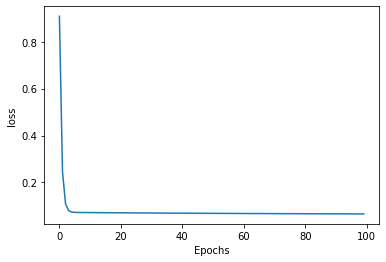

In [8]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

## Draw Data(Scaler)

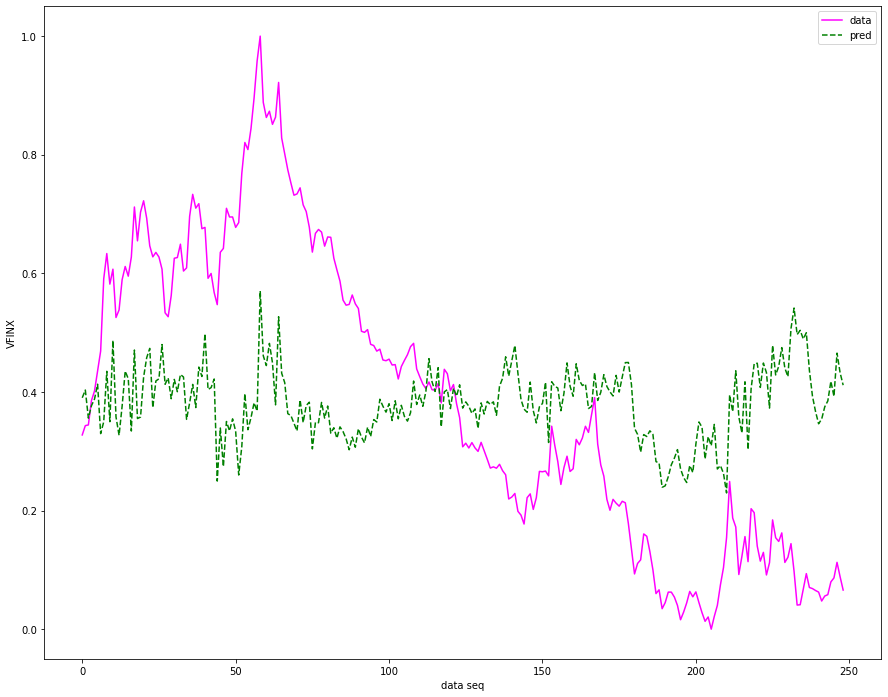

In [9]:
plt.figure(figsize=(15,12))
x_plot, = plt.plot(scaled_test[:,0],'magenta')
y_plot, = plt.plot(prediction.data, 'g--')
plt.xlabel('data seq')
plt.ylabel('VFINX')
plt.legend([x_plot,y_plot],['data','pred'])
plt.show()

In [10]:
data1 = scaler.inverse_transform(scaled_train)
data2 = np.array(prediction.data)

for i in range(0,249)
    data2[i] = data2[i] * (newData['VFINX'].max() - scal.min_[10]) + scal.min_[10]


plt.figure(figsize=(15,12))
x_plot, = plt.plot(data1[:,0],'magenta')
y_plot, = plt.plot(data2, 'g--')
plt.xlabel('data seq')
plt.ylabel('vfinx')
plt.legend([x_plot,y_plot],['data','pred'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-5c92b0cc3024>, line 4)